In [16]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

metro = pd.read_csv('capmetro_UT.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


To find some interesting relationships for this data, let us first look at some basic intuitive relationships

<Figure size 1000x600 with 0 Axes>

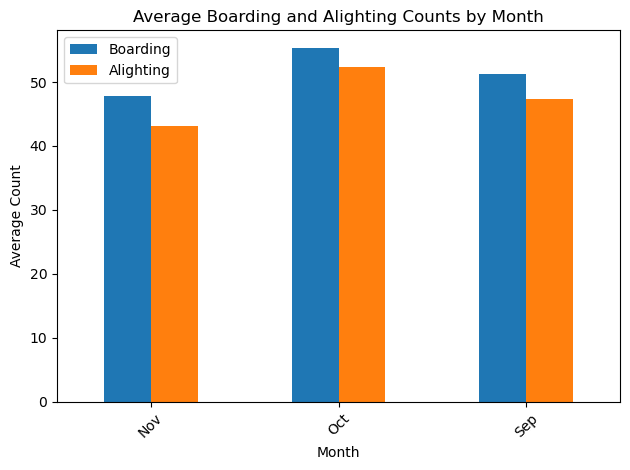

In [7]:
monthly_data = metro.groupby('month')[['boarding', 'alighting']].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='bar')
plt.title('Average Boarding and Alighting Counts by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend(['Boarding', 'Alighting'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

October seems to be a busier period compared to the other two months, this may be due to finals season. November also has the lowest counts, probably accounting for Thanksgiving break. It is also visible that the counts for boarding and alighting are different. One possible reason for this is that the bus operates both earlier and later than what the data accounts for.

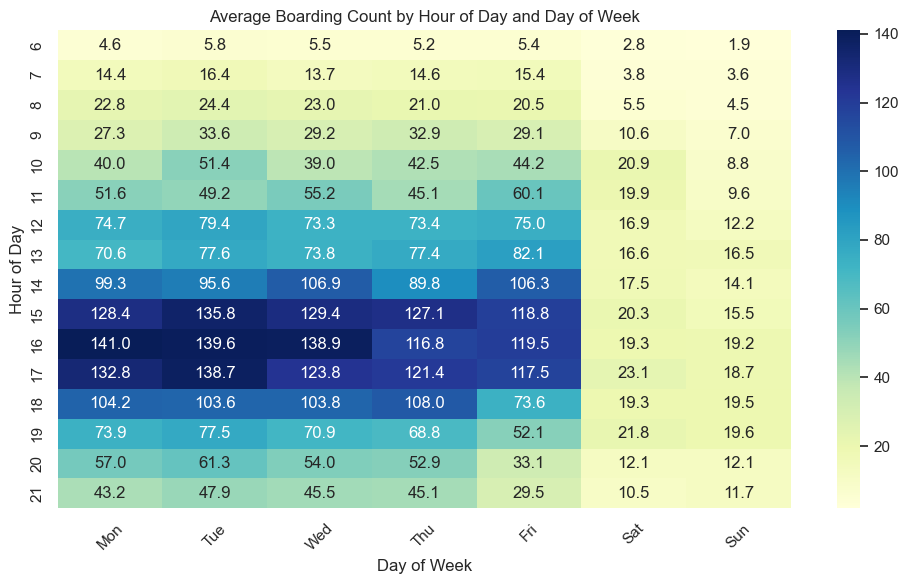

In [41]:
# Defining the order of days of the week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Creating a pivot table to show ridership patterns by hour and day
hourly_day_pivot = metro.pivot_table(index='hour_of_day', columns='day_of_week', values='boarding', aggfunc='mean')

hourly_day_pivot = hourly_day_pivot[day_order]

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_day_pivot, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Boarding Count by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows how on weekdays, there is more ridership during hours 2PM - 5PM, showing that this seems to be the rush hour period where ridership is high.

We can also see that weekends have significantly lower ridership, probably because they aren't class days. 

<Figure size 1000x600 with 0 Axes>

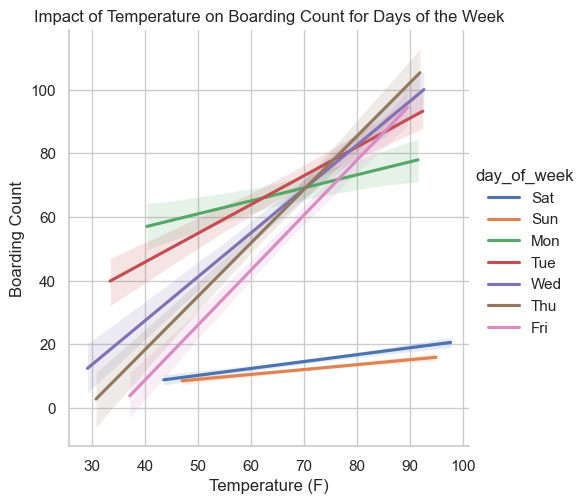

In [42]:
# Create a line plot with trendlines only and hue differentiation based on hour of day
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Remove background color
g = sns.lmplot(data=metro, x='temperature', y='boarding', hue='day_of_week', scatter=False)
g.set_axis_labels("Temperature (F)", "Boarding Count")
plt.title('Impact of Temperature on Boarding Count for Days of the Week')
plt.show()

This plot shows how on weekdays mainly, boarding count increases as temperature increases. This is expected as less people would be willing to walk if the temperature is high. People are less sensitive to temperature changes on Monday, though. This could be due to the fact that after a weekend break, it's possible that individuals might not immediately feel the impact of temperature changes on Mondays. It could take some time for them to acclimate to the new temperature conditions. There might also be a mindset shift where people tend to have more stern priorities and productivities on mondays.

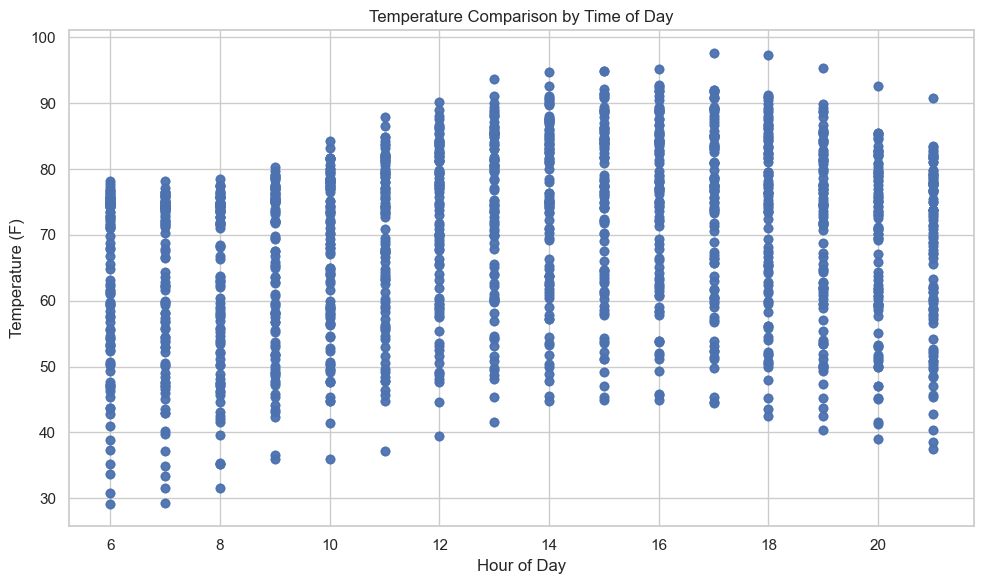

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(metro['hour_of_day'], metro['temperature'], alpha=0.5)
plt.title('Temperature Comparison by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()

Looking at this plot, we see that the afternoon hours of the day are the hottest. So, our previous heatmap showing boarding counts by hour of day could be due to rush hour or also due to temperature changes. Without more information, it is difficult to isolate these effects.   

These plots provide a lot of insight for UT Austin's ridership over the 2018 Fall semester. Most significantly, the rush hour periods are weekdays from 2PM - 5PM, with weekdays having significantly higher ridership than weekends. This could be due to people getting off work/school at this time, or due to temperature. October has the highest ridership overall with it falling as we enter November, probaby due to the beginning of holiday season. 